In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Loading Data

In [2]:
filename = '../data/exoplanet_data.csv'
raw_planets_df = pd.read_csv(filename)
raw_planets_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


## Cleaning Data

In [3]:
# looking at the unique labels
raw_planets_df.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [4]:
# looking at number of features
raw_planets_df.shape[1]

41

In [5]:
# removing blank columns
less_raw_planets_df = raw_planets_df.dropna(axis='columns', how='all')
less_raw_planets_df.shape[1]

41

In [6]:
# removing rows with missing data
planets_df = less_raw_planets_df.dropna()
planets_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [7]:
# just printing a list of all features and outputs
# just for my own benefit, this cell does not need to be run
for col in planets_df.columns:
    print(col)

koi_disposition
koi_fpflag_nt
koi_fpflag_ss
koi_fpflag_co
koi_fpflag_ec
koi_period
koi_period_err1
koi_period_err2
koi_time0bk
koi_time0bk_err1
koi_time0bk_err2
koi_impact
koi_impact_err1
koi_impact_err2
koi_duration
koi_duration_err1
koi_duration_err2
koi_depth
koi_depth_err1
koi_depth_err2
koi_prad
koi_prad_err1
koi_prad_err2
koi_teq
koi_insol
koi_insol_err1
koi_insol_err2
koi_model_snr
koi_tce_plnt_num
koi_steff
koi_steff_err1
koi_steff_err2
koi_slogg
koi_slogg_err1
koi_slogg_err2
koi_srad
koi_srad_err1
koi_srad_err2
ra
dec
koi_kepmag


Seems like the columns I need to use are already given to me.
I want to use Koi_disposition as my label.

### Selecting Features

In [8]:
# selecting features for model (techincally dropping the ones that are not wanted)
selected_features = planets_df.drop(columns=['koi_disposition', 'koi_tce_plnt_num'])

In [9]:
# selecting Output
y = planets_df['koi_disposition']

## Train-Test-Split

In [10]:
# doing a train_test_split with a random state of 42, will only be the same the first time ran
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=21)

## Scaling X's

In [11]:
# importing scaling, encoding and categorizing materials
from sklearn.preprocessing import MinMaxScaler

In [12]:
# scaling X's
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# making a single column that carries the numerical values for the labels
dummy_train = pd.get_dummies(y_train)
y_train_dummied = dummy_train.CANDIDATE # + dummy_train.CONFIRMED

dummy_test = pd.get_dummies(y_test)
y_test_dummied = dummy_test.CANDIDATE # + dummy_test.CONFIRMED

y_train_dummied.unique()

array([0, 1], dtype=uint8)

## Training Model

k: 1, Train/Test Score: 1.000/0.820
k: 3, Train/Test Score: 0.910/0.818
k: 5, Train/Test Score: 0.886/0.818
k: 7, Train/Test Score: 0.870/0.820
k: 9, Train/Test Score: 0.869/0.832
k: 11, Train/Test Score: 0.862/0.832
k: 13, Train/Test Score: 0.861/0.827
k: 15, Train/Test Score: 0.856/0.836
k: 17, Train/Test Score: 0.855/0.830
k: 19, Train/Test Score: 0.853/0.830
k: 21, Train/Test Score: 0.851/0.828
k: 23, Train/Test Score: 0.849/0.831
k: 25, Train/Test Score: 0.847/0.830
k: 27, Train/Test Score: 0.845/0.831
k: 29, Train/Test Score: 0.842/0.827
k: 31, Train/Test Score: 0.840/0.827
k: 33, Train/Test Score: 0.840/0.828
k: 35, Train/Test Score: 0.842/0.832
k: 37, Train/Test Score: 0.840/0.831
k: 39, Train/Test Score: 0.839/0.830
k: 41, Train/Test Score: 0.839/0.823
k: 43, Train/Test Score: 0.840/0.829
k: 45, Train/Test Score: 0.838/0.827
k: 47, Train/Test Score: 0.836/0.826
k: 49, Train/Test Score: 0.835/0.828


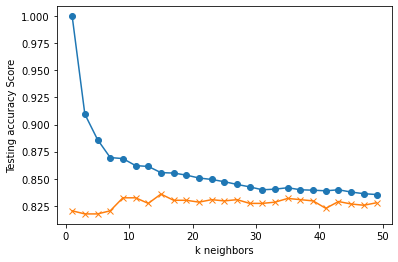

In [14]:
# borrowed the meat of this cell of code from a in class example w21-d2-e5 
train_scores = []
test_scores = []

begin = 1
end = 50
middle = 2

# testing out different models with different values of k
for k in range(begin, end, middle):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_dummied)
    train_score = knn.score(X_train_scaled, y_train_dummied)
    test_score = knn.score(X_test_scaled, y_test_dummied)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
# then plotting them to find where they level off
plt.plot(range(begin, end, middle), train_scores, marker='o')
plt.plot(range(begin, end, middle), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
# after choosing my level of k, 
# I build my model and test its accuracy on the test scores
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train_dummied)
print('k=15 Train Acc: %.3f' % knn.score(X_train_scaled, y_train_dummied))
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test_dummied))

k=15 Train Acc: 0.856
k=15 Test Acc: 0.836
